In [1]:
import os
from os import walk, getcwd
import sys
import csv
import ndjson
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torchvision import datasets,transforms
import torch.utils
import torch.nn.utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
root_path = os.getcwd().split('notebook')[0]
root_path 

'/Users/melodi/sliver-maestro/'

In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.utils.dataset import *
from src.draw_model import *
from src import draw_model

In [4]:
categories_file = os.path.join(root_path, 'src/data/categories.csv')

In [12]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

Select a category to download images from

In [3]:
for key, value in categories.items():
    #print(key)
    pass

In [4]:
print("Select a category from the list above:")
#category=input()
category='moon'

Select a category from the list above:


In [5]:
print("Enter destination directory or url for the data:")
#dst_url=input()
dst_url='data'

Enter destination directory or url for the data:


In [6]:
print("creating directory " + categories[category] + " in " +  dst_url + " ...")

if os.path.exists(dst_url):
    if not os.path.exists(dst_url + "\\" + categories[category]):
        os.mkdir(dst_url + "\\" + categories[category])
else:
    print(dst_url, 'does not exist!')
    
if os.path.exists(dst_url + "\\" + categories[category]):
    print(dst_url + "\\" + categories[category] + " is created...")

creating directory moon in data ...
data\moon is created...


In [7]:
src_list = []
dst_list = []

src_file = "gs://quickdraw_dataset/full/raw/" + categories[category] + ".ndjson"
src_list.append(src_file)
src_file = "gs://quickdraw_dataset/full/numpy_bitmap/" + categories[category] + ".npy"
src_list.append(src_file)

dst_file = dst_url + "\\" + categories[category] + "\\" + categories[category]
dst_list.append(dst_file + ".ndjson")
dst_list.append(dst_file + ".npy")

for (src_file, dst_file) in zip(src_list, dst_list): 
    print(src_file, ",", dst_file)

gs://quickdraw_dataset/full/raw/moon.ndjson , data\moon\moon.ndjson
gs://quickdraw_dataset/full/numpy_bitmap/moon.npy , data\moon\moon.npy


In [8]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

Copying gs://quickdraw_dataset/full/raw/moon.ndjson...
/ [0/1 files][    0.0 B/315.6 MiB]   0% Done                                    
/ [0/1 files][    0.0 B/315.6 MiB]   0% Done                                    
-
\
\ [0/1 files][  3.1 MiB/315.6 MiB]   0% Done                                    
|
/
/ [0/1 files][  9.0 MiB/315.6 MiB]   2% Done                                    
-
- [0/1 files][ 14.7 MiB/315.6 MiB]   4% Done                                    
\
|
| [0/1 files][ 21.1 MiB/315.6 MiB]   6% Done                                    
/
-
- [0/1 files][ 26.8 MiB/315.6 MiB]   8% Done                                    
\
\ [0/1 files][ 32.2 MiB/315.6 MiB]  10% Done                                    
|
/
/ [0/1 files][ 38.2 MiB/315.6 MiB]  12% Done                                    
-
\
\ [0/1 files][ 44.3 MiB/315.6 MiB]  14% Done                                    
|
| [0/1 files][ 50.3 MiB/315.6 MiB]  15% Done   5.6 MiB/s ETA 00:00:47           
/
-
- [0/1 files][ 56.2 

In [9]:
filebase = dst_url + '/' + categories[category] + '/' + categories[category]
print('filebase:', filebase)

filebase: data/moon/moon


In [10]:
npy_data = np.load(filebase + '.npy', allow_pickle=True)

In [11]:
# load from file-like objects
with open(filebase + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [12]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [13]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  121661  images in selected category moon
Select an index value from 0 to 121660 to display and compare bitmap and raw images:
Bitmap image:


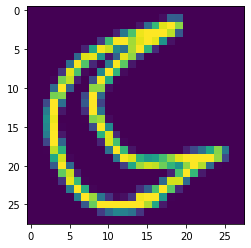

Raw image:


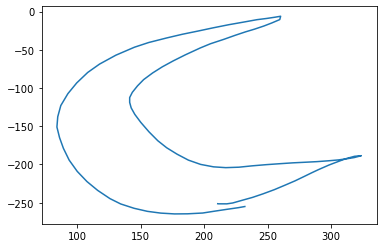

There are 1 number of strokes in this raw image file!


In [156]:
print('There are ', len(npy_data), ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data)-1, "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [10]:
# CONFIG
T = 20
batch_size = 64
A = 28
B = 28
z_size = 10
N = 5
dec_size = 256
enc_size = 256
epoch_num = 10000
learning_rate = 1e-3
beta1 = 0.5
USE_CUDA = False
clip = 5.0
path = os.path.join(root_path,'src/data/input')

In [7]:
category = 'cat'

In [8]:
model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, path, category)

In [11]:
## TODO: test below

In [20]:

optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1,0.999))

if USE_CUDA:
    model.cuda()

def train():
    print("training...")
    model.start(phase='train')

def test():    
    print("testing...")
    model.start(phase='test')


def generate_image(count):
    x = model.generate(batch_size)
    save_image(x,count)

def generate():
    x = model.generate(batch_size)
    save_image(x)

training data length: 1000
test data length: 250


In [21]:
print("Creating directories to save images, weights and the model ...")

if not os.path.exists('image'):
    os.mkdir('image')
    if os.path.exists('image'):
        print("image folder is created...")

if not os.path.exists('weights'):
    os.mkdir('weights')
    if os.path.exists('weights'):
        print("weights folder is created...")

if not os.path.exists('model'):
    os.mkdir('model')
    if os.path.exists('model'):
        print("model folder is created...")    

Creating directories to save images, weights and the model ...


In [ ]:
# IDX VALIDATION

In [59]:
# LOADING MODEL
torch.set_default_tensor_type('torch.FloatTensor')
model = DRAW(T, A, B, z_size, N, dec_size, enc_size)
model.load_state_dict(torch.load('model/draw.pth', map_location=torch.device('cpu')))
model.eval()

DrawModel(
  (encoder): LSTMCell(306, 256)
  (encoder_gru): GRUCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (decoder_gru): GRUCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [172]:
print('There are ', len(npy_data), ' images in selected database')
print("Enter image index from 0 to", len(npy_data)-1, "to display and compare bitmap and raw images:")
index=int(input())

There are  121661  images in selected database
Enter image index from 0 to 121660 to display and compare bitmap and raw images:
9


In [173]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))
    plt.show()

def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    plt.show()
    print('There are', i, 'number of strokes in this raw image file!')
    print('Image key id:', ndjson_data[int(index)]['key_id'])

In [108]:
print(x_train.shape)
print(x_test.shape)

(64000, 784)
(16000, 784)


Bitmap image:


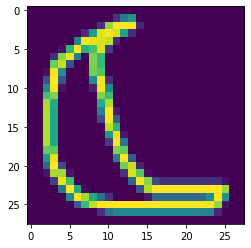

In [174]:
plot_bitmap()

Raw image:


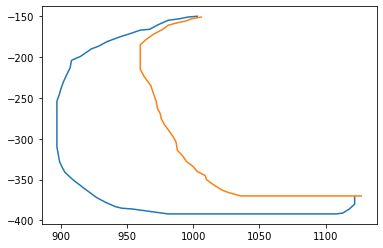

There are 2 number of strokes in this raw image file!
Image key id: 5873241388220416


In [175]:
plot_raw()

In [180]:
def validate():    
    print("validating...")

    avg_loss = 0
    count = 0

    data = npy_data[index:index+1]
    data = np.reshape(data, (data.shape[0], 1, A, B))
    data = torch.Tensor(data)
    bs = data.size()[0]
    data = Variable(data).view(bs, -1)
    loss = model.loss(data)
    avg_loss += loss.cpu().data.numpy()
    generate_image(count)
    
def generate_image(count):
    x = model.generate(batch_size)
    save_image(x,count)

def generate():
    x = model.generate(batch_size)
    save_image(x)

validating...
loss: 208337.25;
image/count_0_test_0.png
image/count_0_test_1.png
image/count_0_test_2.png
image/count_0_test_3.png
image/count_0_test_4.png
image/count_0_test_5.png
image/count_0_test_6.png
image/count_0_test_7.png
image/count_0_test_8.png
image/count_0_test_9.png
image/count_0_test_10.png
image/count_0_test_11.png
image/count_0_test_12.png
image/count_0_test_13.png
image/count_0_test_14.png
image/count_0_test_15.png
image/count_0_test_16.png
image/count_0_test_17.png
image/count_0_test_18.png
image/count_0_test_19.png


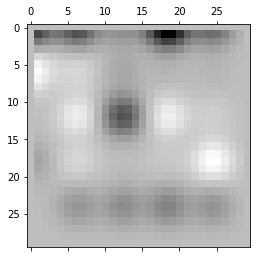

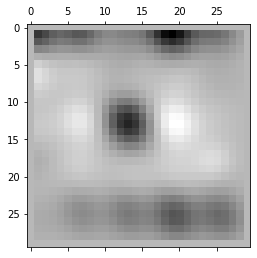

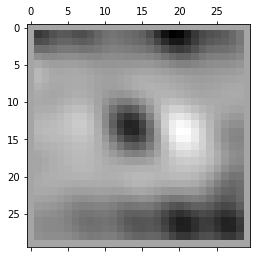

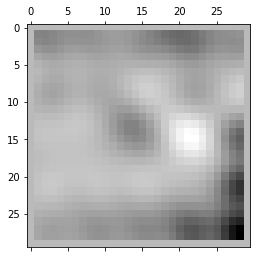

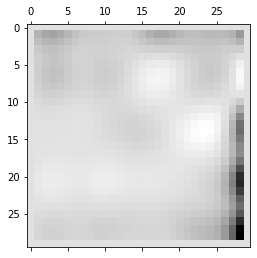

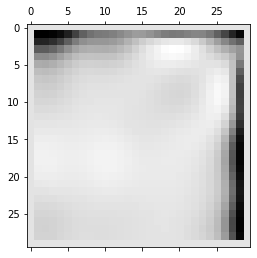

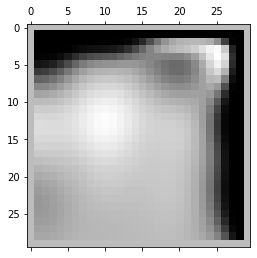

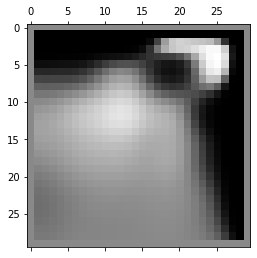

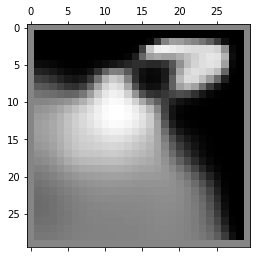

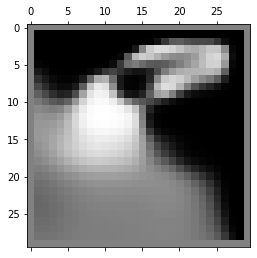

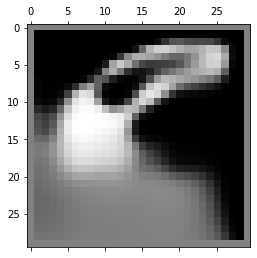

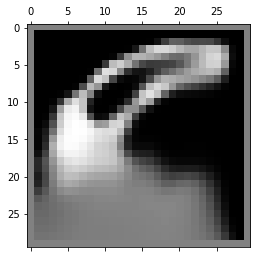

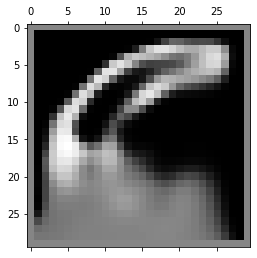

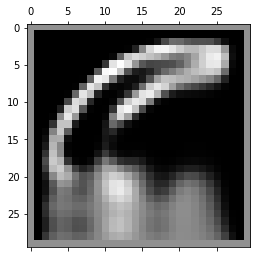

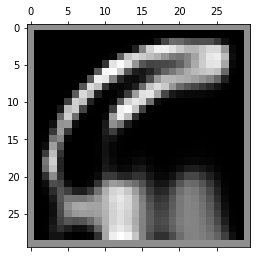

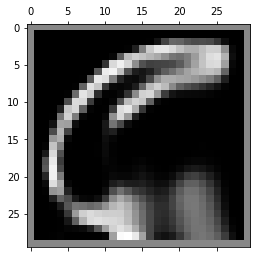

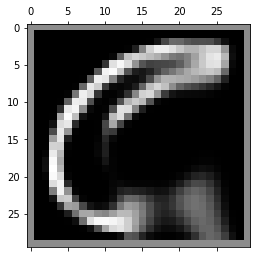

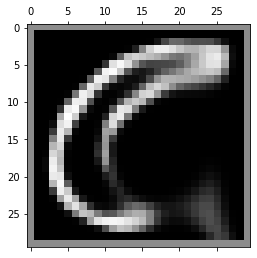

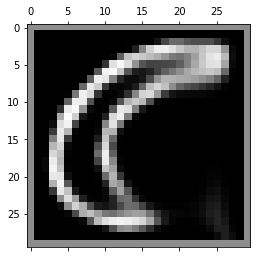

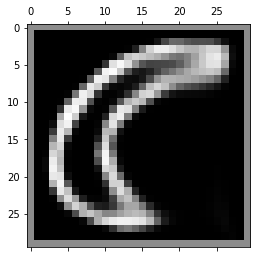

In [181]:
validate()